## Data Gathering

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [32]:
# Reading the training file
df = pd.read_csv(r'C:\Users\srini\Projects\Titanic\train (2).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
# finding the gender of the passengers
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [35]:
# finding duplicates in the data
df.duplicated().sum()

0

In [36]:
# finding missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
# making a copy of the dataset before cleaning
df2= df.copy()

There are some rows with missing age. We will explore them further.

In [38]:
# missing age
df[df.Age.isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [29]:
# Exporing the sibling-spouse column
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
# exploring the patriarchial column
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [42]:
def cleaning_func(df):
    """Creating a function that will handle the cleaning of the dataframe"""
    # filling the mean value for age for the missing data
    df.Age.fillna(np.mean(df.Age),inplace= True )
    
    # making binary values for the Sex column
    df.Sex.replace({'male':1, 'female':0}, inplace= True)
    
    # Creating dummy columns for the Class of the passengers
    df= pd.concat([df, pd.get_dummies(df.Pclass)], axis=1 )
    
    # Creating dummies for the Embarked category
    df= pd.concat([df, pd.get_dummies(df.Embarked)], axis=1)
    
    return df

In [43]:
# cleaning the function df
df= cleaning_func(df)

In [45]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0


## Data Exploration

C:\Users\srini\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\srini\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


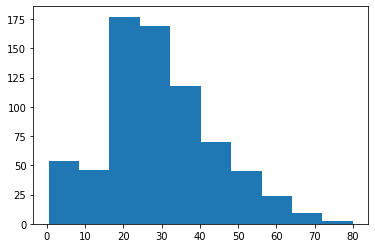

In [6]:
# Finding distribution for the age
plt.hist(df.Age)
plt.show()

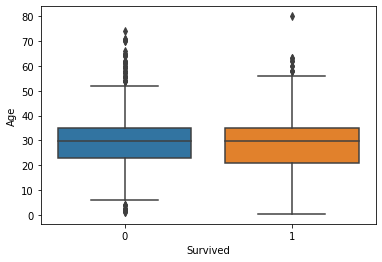

In [46]:
# finding if there is a difference between age of people who survived and died
sns.boxplot(x=df.Survived, y=df.Age)
plt.show()

There does not seem to be much difference between the age of the people who survived and who died.

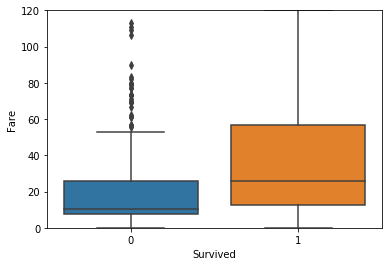

In [50]:
# finding if there is a difference between price of ticket for the people who survived and died
sns.boxplot(x=df.Survived, y=df.Fare)
plt.ylim(0,120)
plt.show()

This shows that most of the people who survived were people who had purchased more expensive ticket.

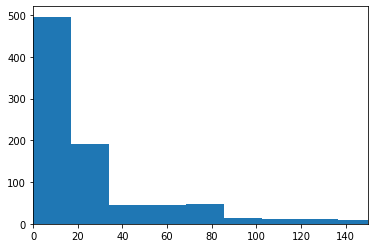

In [54]:
# distribution for the fare of the people
plt.hist(df.Fare, bins=30)
plt.xlim(0,150)
plt.show()

C:\Users\srini\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


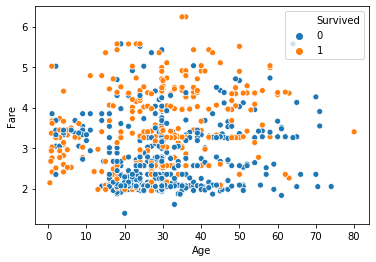

In [57]:
sns.scatterplot(x=df.Age, y= np.log(df.Fare), hue= df.Survived)
plt.show()

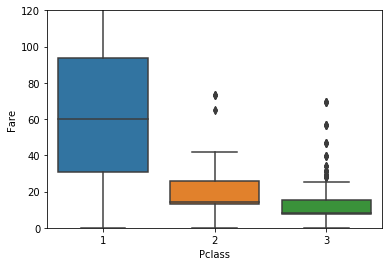

In [60]:
# distribution of the price of the ticket and the class
sns.boxplot(x=df.Pclass, y=df.Fare)
plt.ylim(0,120)
plt.show()

In [63]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0


In [66]:
X= df[['Sex','Age','Fare',1,2,3,'C','Q','S']]
y= df['Survived']

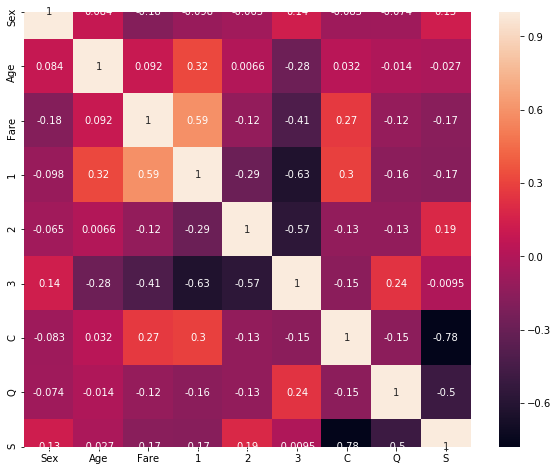

In [71]:
# finding the correlation between the predictors
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame.corr(X), annot=True)
plt.show()

So there is not much coreraltion betweent the predictors except the dummy variables.

## Creating a pipeline

In [77]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=1, stratify=y )
X_train.shape, X_test.shape, y_train.shape

((623, 9), (268, 9), (623,))

In [86]:
# Modelling logistic regression to the data
hyperparameter= [0.1,0.3,1,3,10,30,100]
train_score_list=[]
test_score_list=[]

for c in hyperparameter:
    
    my_pipeline= Pipeline([
    ('std', StandardScaler()),
    ('clf', LogisticRegression(solver='lbfgs',C=c ))])
    
    my_pipeline.fit(X_train, y_train)
    
    train_pred= my_pipeline.predict(X_train)
    test_pred= my_pipeline.predict(X_test)
    
    train_score_list.append(accuracy_score(y_train, train_pred))
    test_score_list.append(accuracy_score(y_test, test_pred))

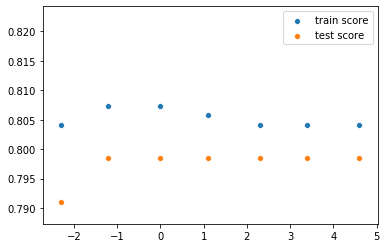

In [94]:
sns.scatterplot(x=np.log(hyperparameter), y=train_score_list, label= 'train score')
sns.scatterplot(x=np.log(hyperparameter), y=test_score_list, label='test score')
plt.legend()
#plt.xlim(0,11)
plt.show()